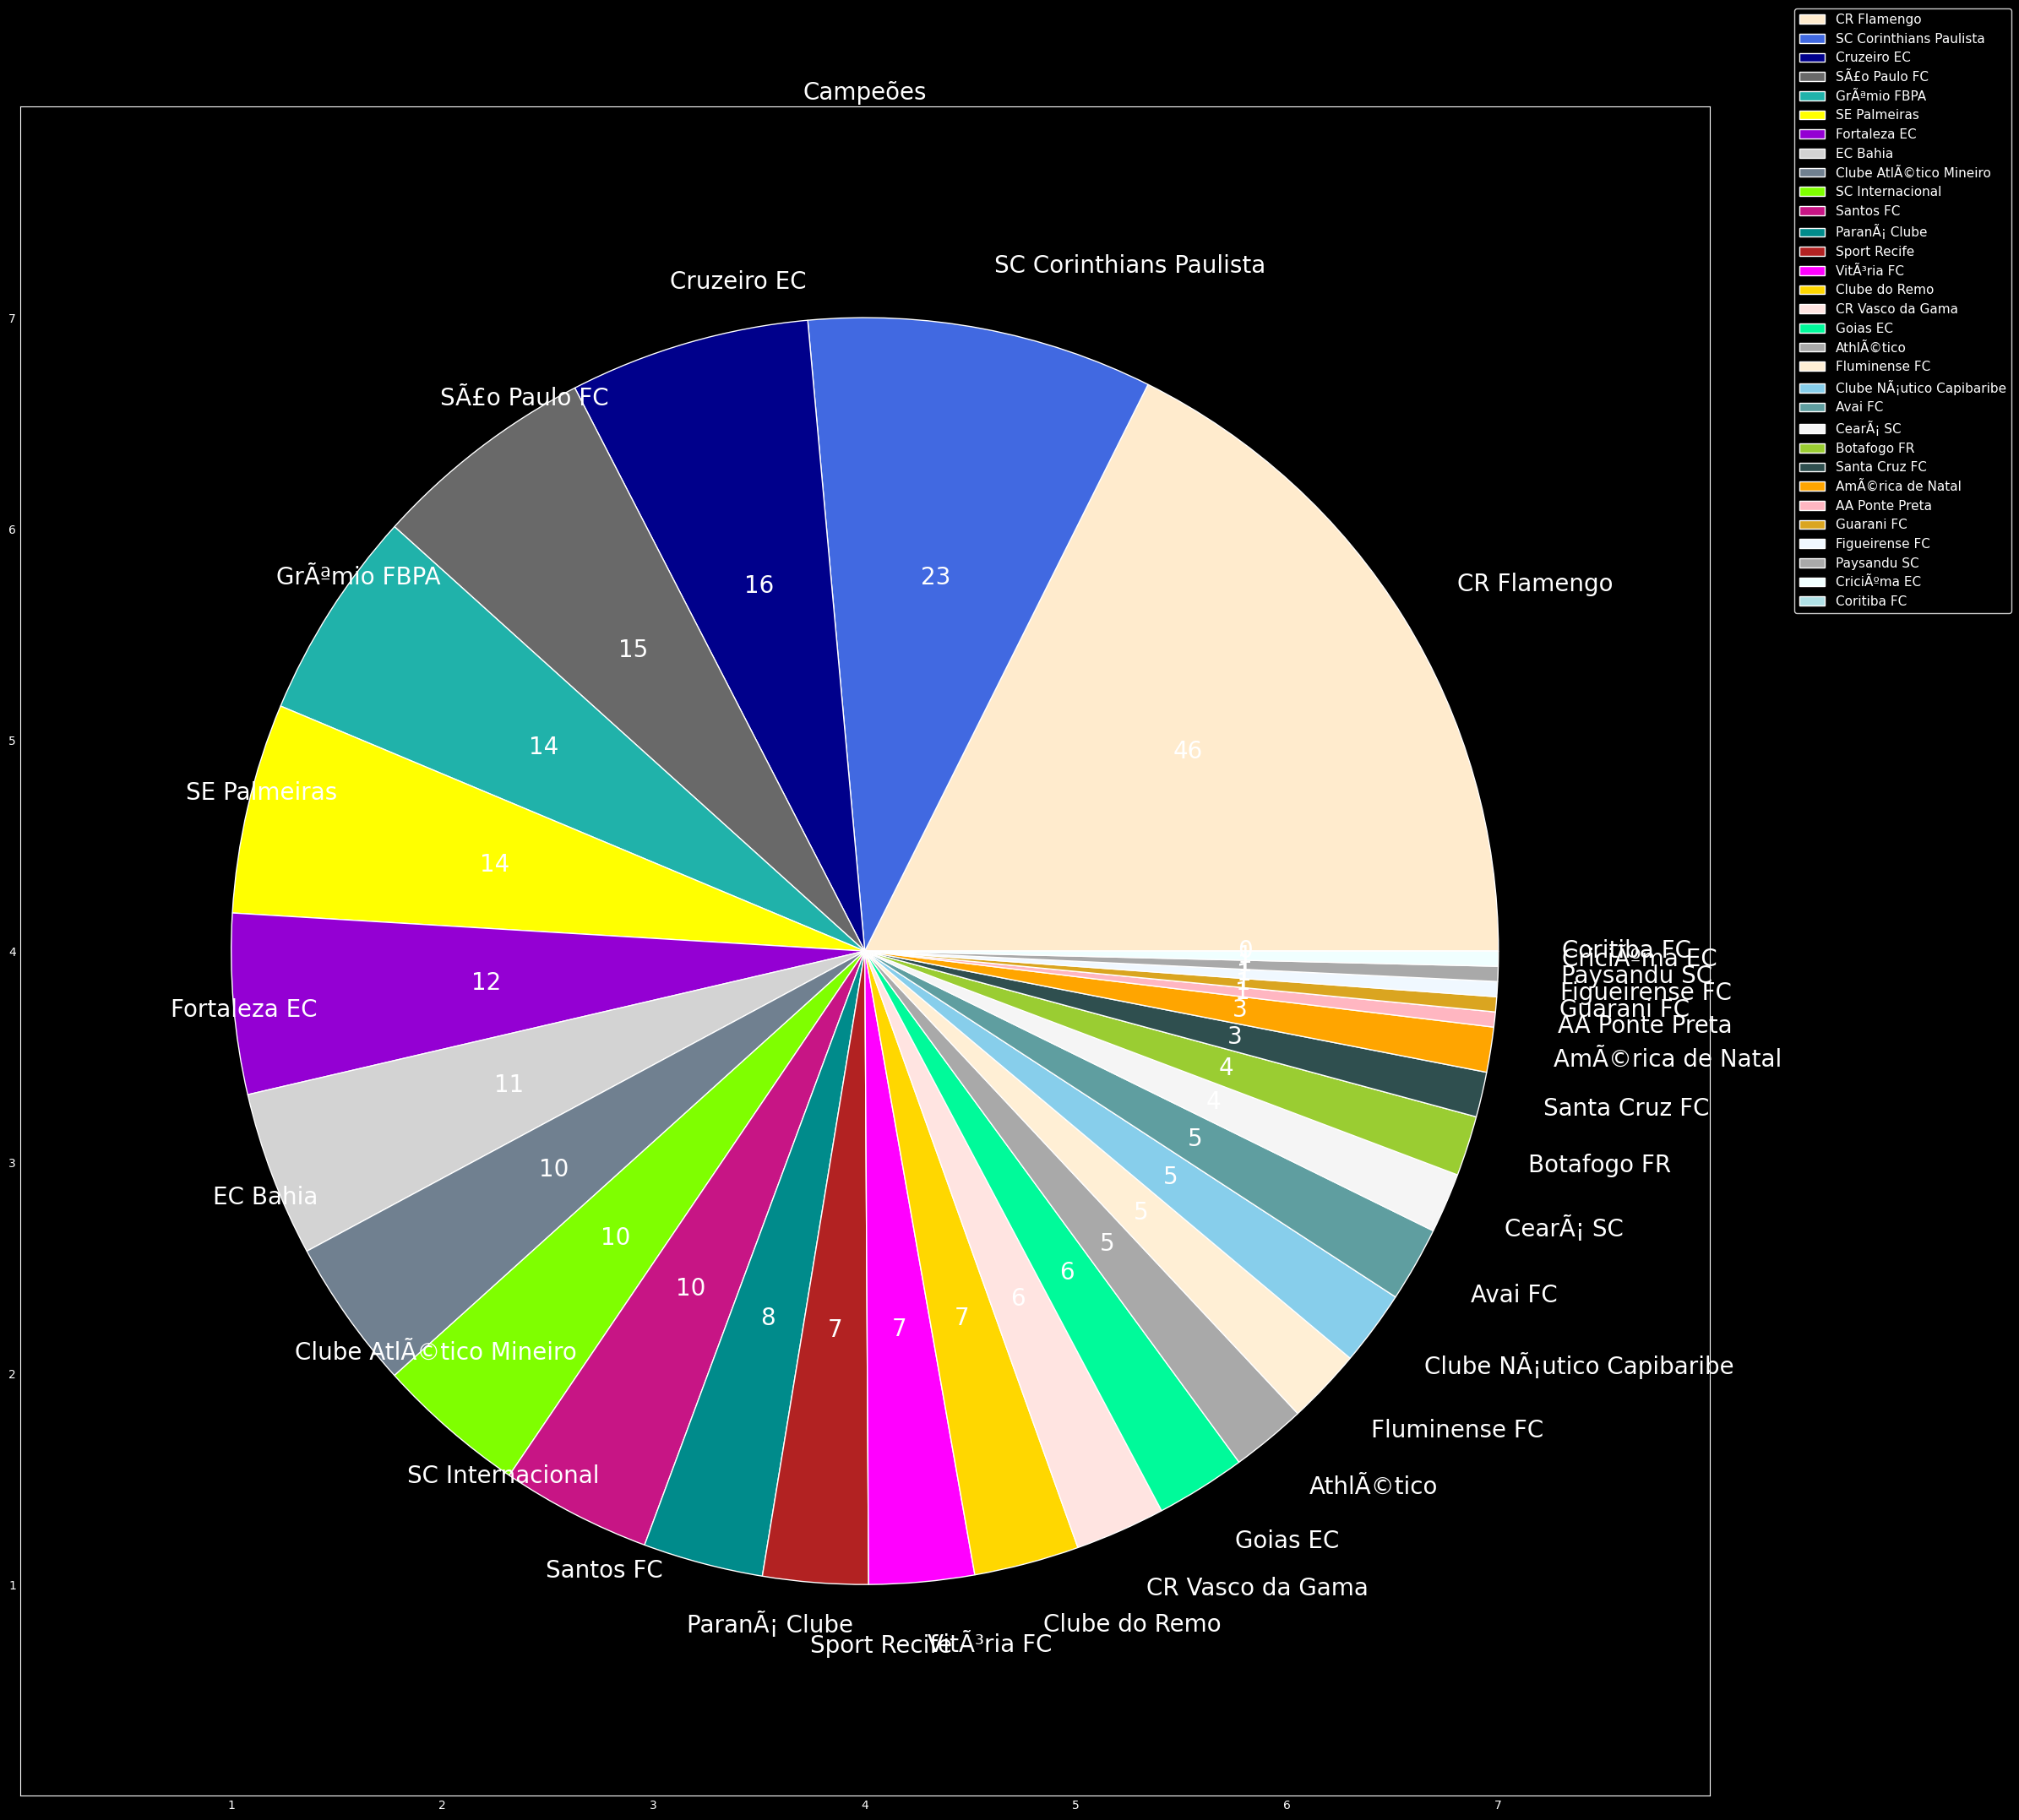

[{'titles': 46}, {'second': 15}, {'finals': 61}, {'state': 'RJ'}]


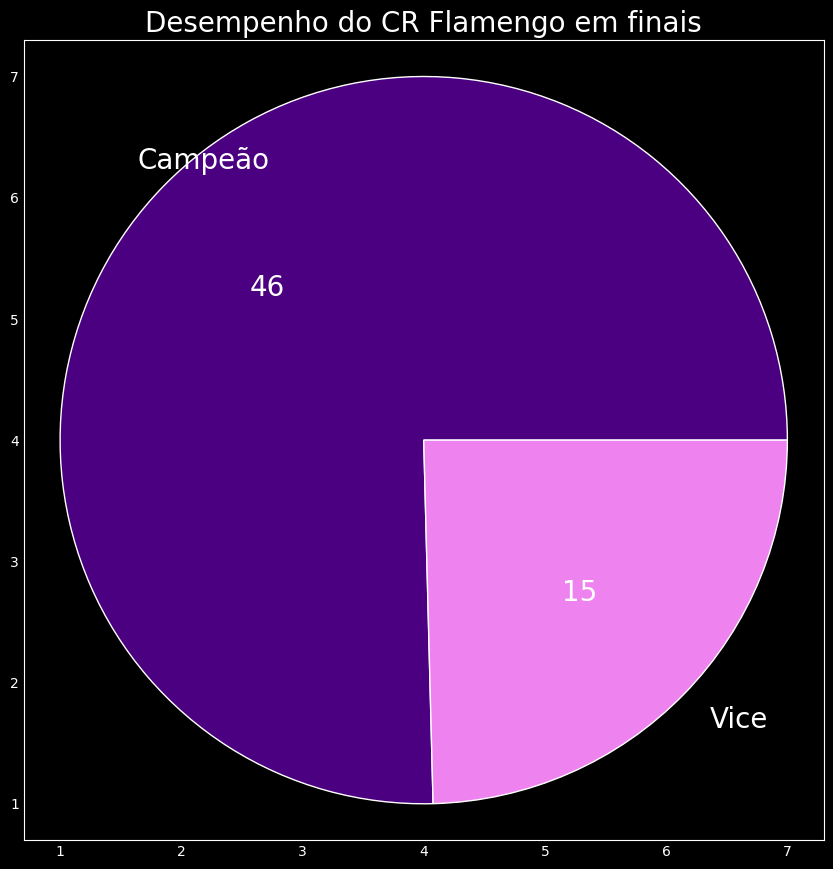

In [17]:
from matplotlib import pyplot as plt, colors as pltc
import numpy as np
from random import sample

import analysis
import utils

class Generate_Charts:
    def __init__(self, sheet_titles):
        self.sheet_titles = sheet_titles
        self.utils = utils.Utils()
        plt.style.use('_mpl-gallery-nogrid')
        plt.style.use(['dark_background'])

    def generate_colors(self, max_size):
        all_colors = [k for k,v in pltc.cnames.items()]
        colors = sample(all_colors, len(max_size))
        return colors

    def championship_chart(self):
        x = list(self.sheet_titles.keys())
        y = []

        for i in self.sheet_titles:
            y.append(self.sheet_titles[i][0]['titles'])

        wedge_props = {"linewidth": 1, "edgecolor": "white"}
        text_props = {'fontsize': 20}
        auto_pct = self.utils.autopct_format(y)

        fig, ax = plt.subplots()
        fig.subplots_adjust(10,0,20,20)
        ax.set_title('Campeões', fontsize=20)
        ax.pie(y, autopct=auto_pct,colors=self.generate_colors(y), labels=x, radius=3, center=(4, 4),
               wedgeprops=wedge_props, textprops=text_props, frame=True)
        
        plt.legend(x, loc=(1.05, 0.7), shadow=True,  prop={'size': 11})

        ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
               ylim=(0, 8), yticks=np.arange(1, 8))
        plt.show()


    def finals_win_percentage(self, team):
        selected_team = self.sheet_titles[team]

        data = [selected_team[0]['titles'], selected_team[1]['second']]

        wedge_props = {"linewidth": 1, "edgecolor": "white"}
        text_props = {'fontsize': 20}
        auto_pct = self.utils.autopct_format(data)

        fig, ax = plt.subplots()
        fig.subplots_adjust(1,0,5,5)
        ax.set_title(f'Desempenho do {team} em finais', fontsize=20)
        ax.pie(data, autopct=auto_pct, colors=['indigo','violet'], labels=['Campeão', 'Vice'], radius=3, center=(4, 4),
               wedgeprops=wedge_props, textprops=text_props, frame=True)

    def caller(self):
        self.championship_chart()
        #self.finals_win_percentage('CR Flamengo')


if (__name__ == '__main__'):
    sheet_link = 'https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vS5qVKbg9hoLHg00Y5AqZu5XQxylCKHDjlOL0y3MtDRAVHmJcdkCp9tzi5m9kXwES8ObCqplRXHSW4M/pubhtml#'
    data = analysis.Analysis(sheet_link)
    data.caller()

    main = Generate_Charts(data.sheet_titles)
    main.caller()